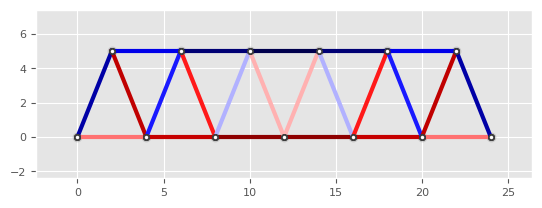

In [9]:
import numpy as np
from analisis_cerchas import calc_esfuerzos_int,vis_esfuerzos,graficar
from funciones_cerchas import warren_bridge_data
from plane_trusses import analysis

data = warren_bridge_data(largo=24.0, alto=5, n=3, seccion=0.02, young=200e9, carga_total=400e3)
disp = analysis(data)
esfuerzos = calc_esfuerzos_int(data['nodes'], data['elements'], data['mats'], disp)
vis_esfuerzos(data['nodes'], data['elements'], esfuerzos)

In [22]:
def warren_roof_data(largo=24.0, alto=6, seccion=0.02, young=200e9, carga_total=400e3):
    """
    Genera los datos estructurales para una cercha tipo puente Warren.

    Parámetros:
    largo: Longitud total del puente (en metros).
    alto: Altura del puente (en metros).
    n: Número de segmentos horizontales en la mitad de la cercha.
    seccion: Área de la sección transversal de los elementos (en metros cuadrados).
    young: Módulo de Young del material (en Pascales).
    carga_total: Carga total distribuida en los nodos inferiores (en Newtons).

    Retorno:
    Un diccionario con los datos de los nodos, elementos, restricciones, cargas y materiales.
    """

    # número de segmentos horizontales   
    n = 6

    # Crear lista para almacenar los nodos
    nodes = []

    # Nodos inferiores (sobre el eje horizontal)
    for i in range(n + 1):
        nodes.append([i * (largo / n), 0.0])

    nodes.append([largo / n, alto/n*2])

    nodes.append([2*(largo / (n)), 2*alto/n*2])

    # Nodos superiores (desplazados a mitad del paso y a la altura definida)
    nodes.append([(largo / (n/2-1)), alto])

    nodes.append([4*(largo / (n)), 2*alto/n*2])

    nodes.append([5*largo / n, alto/n*2])

 

 


    # Convertir lista de nodos a un array de numpy
    nodes = np.array(nodes)

    # Definir elementos (conectividad e índice de propiedades del material)
    elements = []

    ele_num = 0
    # Chords inferiores: conectan nodos consecutivos de la parte inferior
    for i in range(0,n):
        elements.append([ele_num, i, i + 1])
        ele_num += 1
        elements.append([ele_num, i, n+(i)])
        ele_num += 1

    for i in range(n+1,2*n-1):
        elements.append([ele_num, i, i + 1])
        ele_num += 1
 
    elements.append([ele_num, 0, n + 1])

    elements.append([ele_num, n, -1])

    # Convertir la lista de elementos a un array de numpy
    elements = np.array(elements)

    # Crear el arreglo de restricciones lleno de ceros con la misma forma de los nodos
    cons = np.zeros((nodes.shape[0], 2), dtype=int)

    # Modificar restricciones específicas según el problema
    cons[0] = [0, -1]   # Nodo 0: Fijo en y (Soporte izquierdo)
    cons[n] = [-1, -1]  # Nodo n: Fijo en x e y (Soporte derecho)

    # Crear el arreglo de fuerzas lleno de ceros con la misma forma de los nodos
    loads = np.zeros((nodes.shape[0], 2), dtype=float)

    # Aplicar fuerzas verticales de -carga_total/n en los nodos inferiores (excepto los extremos)
    for i in range(1, n):  # Desde el nodo 1 hasta el nodo n-1 (excluyendo extremos)
        loads[i, 1] = -carga_total / n  # Fuerza en la dirección y

    # Inicialización de secciones con el caso más costoso
    sections = [seccion] * np.shape(elements)[0]  # Secciones iniciales
    
    # Crear un array con los módulos de Young de los elementos
    modulus_of_elasticity = np.ones_like(sections) * young

    # Crear un array con los módulos de Young y las secciones transversales
    materials = np.array([modulus_of_elasticity, sections]).T

    # Preparar el diccionario de datos como se espera en la función de análisis
    data = {
        "nodes": nodes,
        "cons": cons,
        "elements": elements,
        "loads": loads,
        "mats": materials
    }

    return data

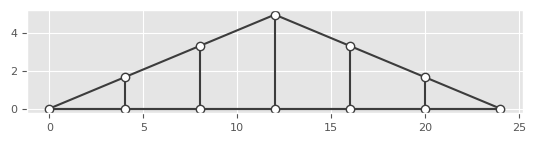

In [23]:
data = warren_roof_data(largo=24.0, alto=5, seccion=0.02, young=200e9, carga_total=400e3)
graficar(data['nodes'], data['elements'])